In [118]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
from keras.constraints import maxnorm
from keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
train_path = 'nhcd/train'
valid_path = 'nhcd/valid'
test_path = 'nhcd/test'

In [120]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['0', '1'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['0', '1'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['0', '1'], batch_size=10)

Found 576 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [121]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [122]:
imgs, labels = next(train_batches)

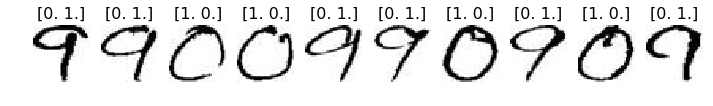

In [123]:
plots(imgs, titles=labels)

In [124]:
# Create the model
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [125]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_8 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 6.8502 - acc: 0.5750 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 2/5
 - 6s - loss: 8.8650 - acc: 0.4500 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 3/5
 - 5s - loss: 5.2384 - acc: 0.6750 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 4/5
 - 5s - loss: 6.8502 - acc: 0.5750 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 5/5
 - 4s - loss: 10.0738 - acc: 0.3750 - val_loss: 9.0664 - val_acc: 0.4375


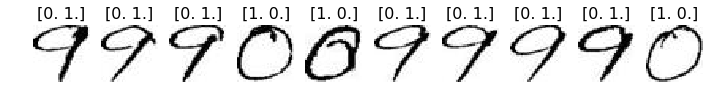

In [128]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [129]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 1.], dtype=float32)

In [130]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [131]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [132]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [133]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7 0]
 [3 0]]


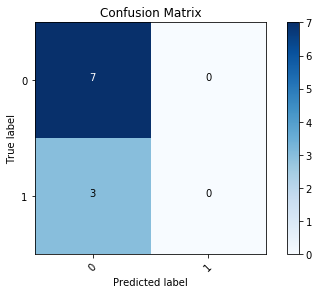

In [134]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [135]:
vgg16_model = keras.applications.vgg16.VGG16()

In [136]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [137]:
type(vgg16_model)

keras.engine.training.Model

In [138]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [140]:
model.layers.pop()

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [142]:
for layer in model.layers:
    layer.trainable = False

In [143]:
model.add(Dense(2, activation='softmax'))

In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [145]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
model.fit_generator(train_batches, steps_per_epoch=1, 
                    validation_data=valid_batches, validation_steps=1, epochs=5, verbose=2)

Epoch 1/5
 - 26s - loss: 0.6928 - acc: 0.6000 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 2/5
 - 25s - loss: 0.6916 - acc: 0.7000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/5
 - 24s - loss: 0.6881 - acc: 0.8000 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 4/5
 - 23s - loss: 0.6866 - acc: 0.9000 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 5/5
 - 23s - loss: 0.6893 - acc: 0.7000 - val_loss: 0.6899 - val_acc: 0.5000


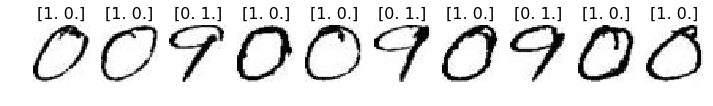

In [100]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [101]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 1.], dtype=float32)

In [102]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [103]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[1 2]
 [1 6]]


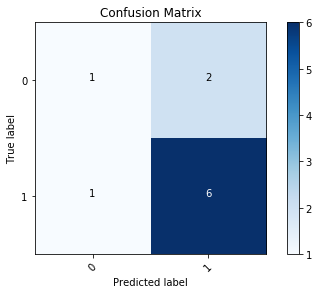

In [105]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [148]:
model.compile?